## Solving Differential Equations by Various Methods ##

Import the usual libraries

In [1]:
from array import array
import numpy as np
import matplotlib.pyplot as plt
import math

We seek a solution to a differential equation of the form:

\begin{equation}
y^\prime = \frac{dy}{dt} = f(t,y)
\end{equation}

We wish to solve this equation on the interval $a \leq t \leq b$, in the case where we know the initial
value of the function (and thus also its derivative) at $t=a$:

\begin{equation}
y_a = y(t=a)
\end{equation}
\begin{equation}
y^\prime_a = f(t=a,y=y_a)
\end{equation}

We presume that the problem is phrased such that we know the differental equation.  Define a function, $fderiv$, that take the current value of $y(t)$ and $t$ as arguments, and will calculate the first derivative at this value of $t$.  The array called $deriv$ will be a global array.

In [2]:
def fderiv(y,t,deriv):
    deriv[0] = 2.0*t*y[0]*y[0]
    #deriv[0] = math.exp(t)

For some quadrature rules, we may also need the second derivative (which we can presumably calculate using the usual rules of calculus:

\begin{equation}
y^{\prime \prime} = \frac{d^2 y}{dt^2} = f^\prime(t,y) = \frac{\partial f}{\partial t} + y^\prime \frac{\partial f}{\partial y}
\end{equation}

In [3]:
def fderiv2(y,t,deriv,secondderiv):
    secondderiv[0] = 4.0*t*y[0]*deriv[0] + 2.0*y[0]*y[0]
    #secondderiv[0] = math.exp(t)

In some cases, we may also be given (or can calculate using some traditional analytical method of differential
equation solving) the exact solution to the given differential equation).

In [4]:
def yexact(t):
    return 1.0/(1.0-t*t)
    #return math.exp(t)

### Euler Method ###

The value of $y(t_{i+1})$ is given in terms of $y(t_i)$ according to:

\begin{equation}
y_{i+1} = y_i + \tau f(t,y)
\end{equation}

where $\tau = t_{i+1} - t_i$ is the time step.

In [5]:
def euler(y,nY,t,tau,deriv):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

### Second Order Euler Method ###

The value of $y(t_{i+1})$ is given in terms of $y(t_i)$ according to:

\begin{equation}
y_{i+1} = y_i + \tau f(t,y) + \frac{1}{2} f^\prime(t,y) \tau^2
\end{equation}

where $\tau = t_{i+1} - t_i$ is the time step.

In [6]:
def euler2(y,nY,t,tau,deriv,secondderiv):
    F1 = array('d')
    F2 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        
    fderiv(y,t,F1)
    fderiv2(y,t,F1,F2)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i] + 0.5*tau*tau*F2[i]

The Second-Order Runge Kutta algorithm proceeds as follows:

\begin{equation}
F_1 = f(t_i,y_i) \\
F_2 = f(t_i + \frac{\tau}{2}, y_i + \frac{\tau}{2} F_1) \\
\end{equation}

\begin{equation}
y_{i+1} = y_i + \tau F_2
\end{equation}

In [7]:
def rk2(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

The Fourth-Order Runge Kutta algorithm proceeds as follows:

\begin{equation}
F_1 = f(t_i,y_i) \\
F_2 = f(t_i + \frac{\tau}{2}, y_i + \frac{\tau}{2} F_1) \\
F_3 = f(t_i + \frac{\tau}{2}, y_i + \frac{\tau}{2} F2) \\
F_4 = f(t_i + \tau, y_i + \tau F_3)
\end{equation}

\begin{equation}
y_{i+1} = y_i + \frac{\tau}{6} \left ( F_1 + 2F_2 + 2F3 + F_4 \right)
\end{equation}

In [8]:
def rk4(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    F3 = array('d')
    F4 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        F3.append(0.0)
        F4.append(0.0)
        ytemp.append(0.0)
        
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
    
    for i in range(0,nY):
        ytemp[i] = y[i] + half_tau*F2[i]
        
    fderiv(ytemp,t_half,F3)
    
    t_full = t + tau

    for i in range(0,nY):
        ytemp[i] = y[i] + tau*F3[i]
        
    fderiv(ytemp,t_full,F4)
    
    for i in range(0,nY):
        y[i] = y[i] + tau/6.0*(F1[i]+F4[i]+2.0*(F2[i]+F3[i]))

With these various quadrature functions defined, we are ready to solve the differential equation in four different ways, and then compare to the exact solution.

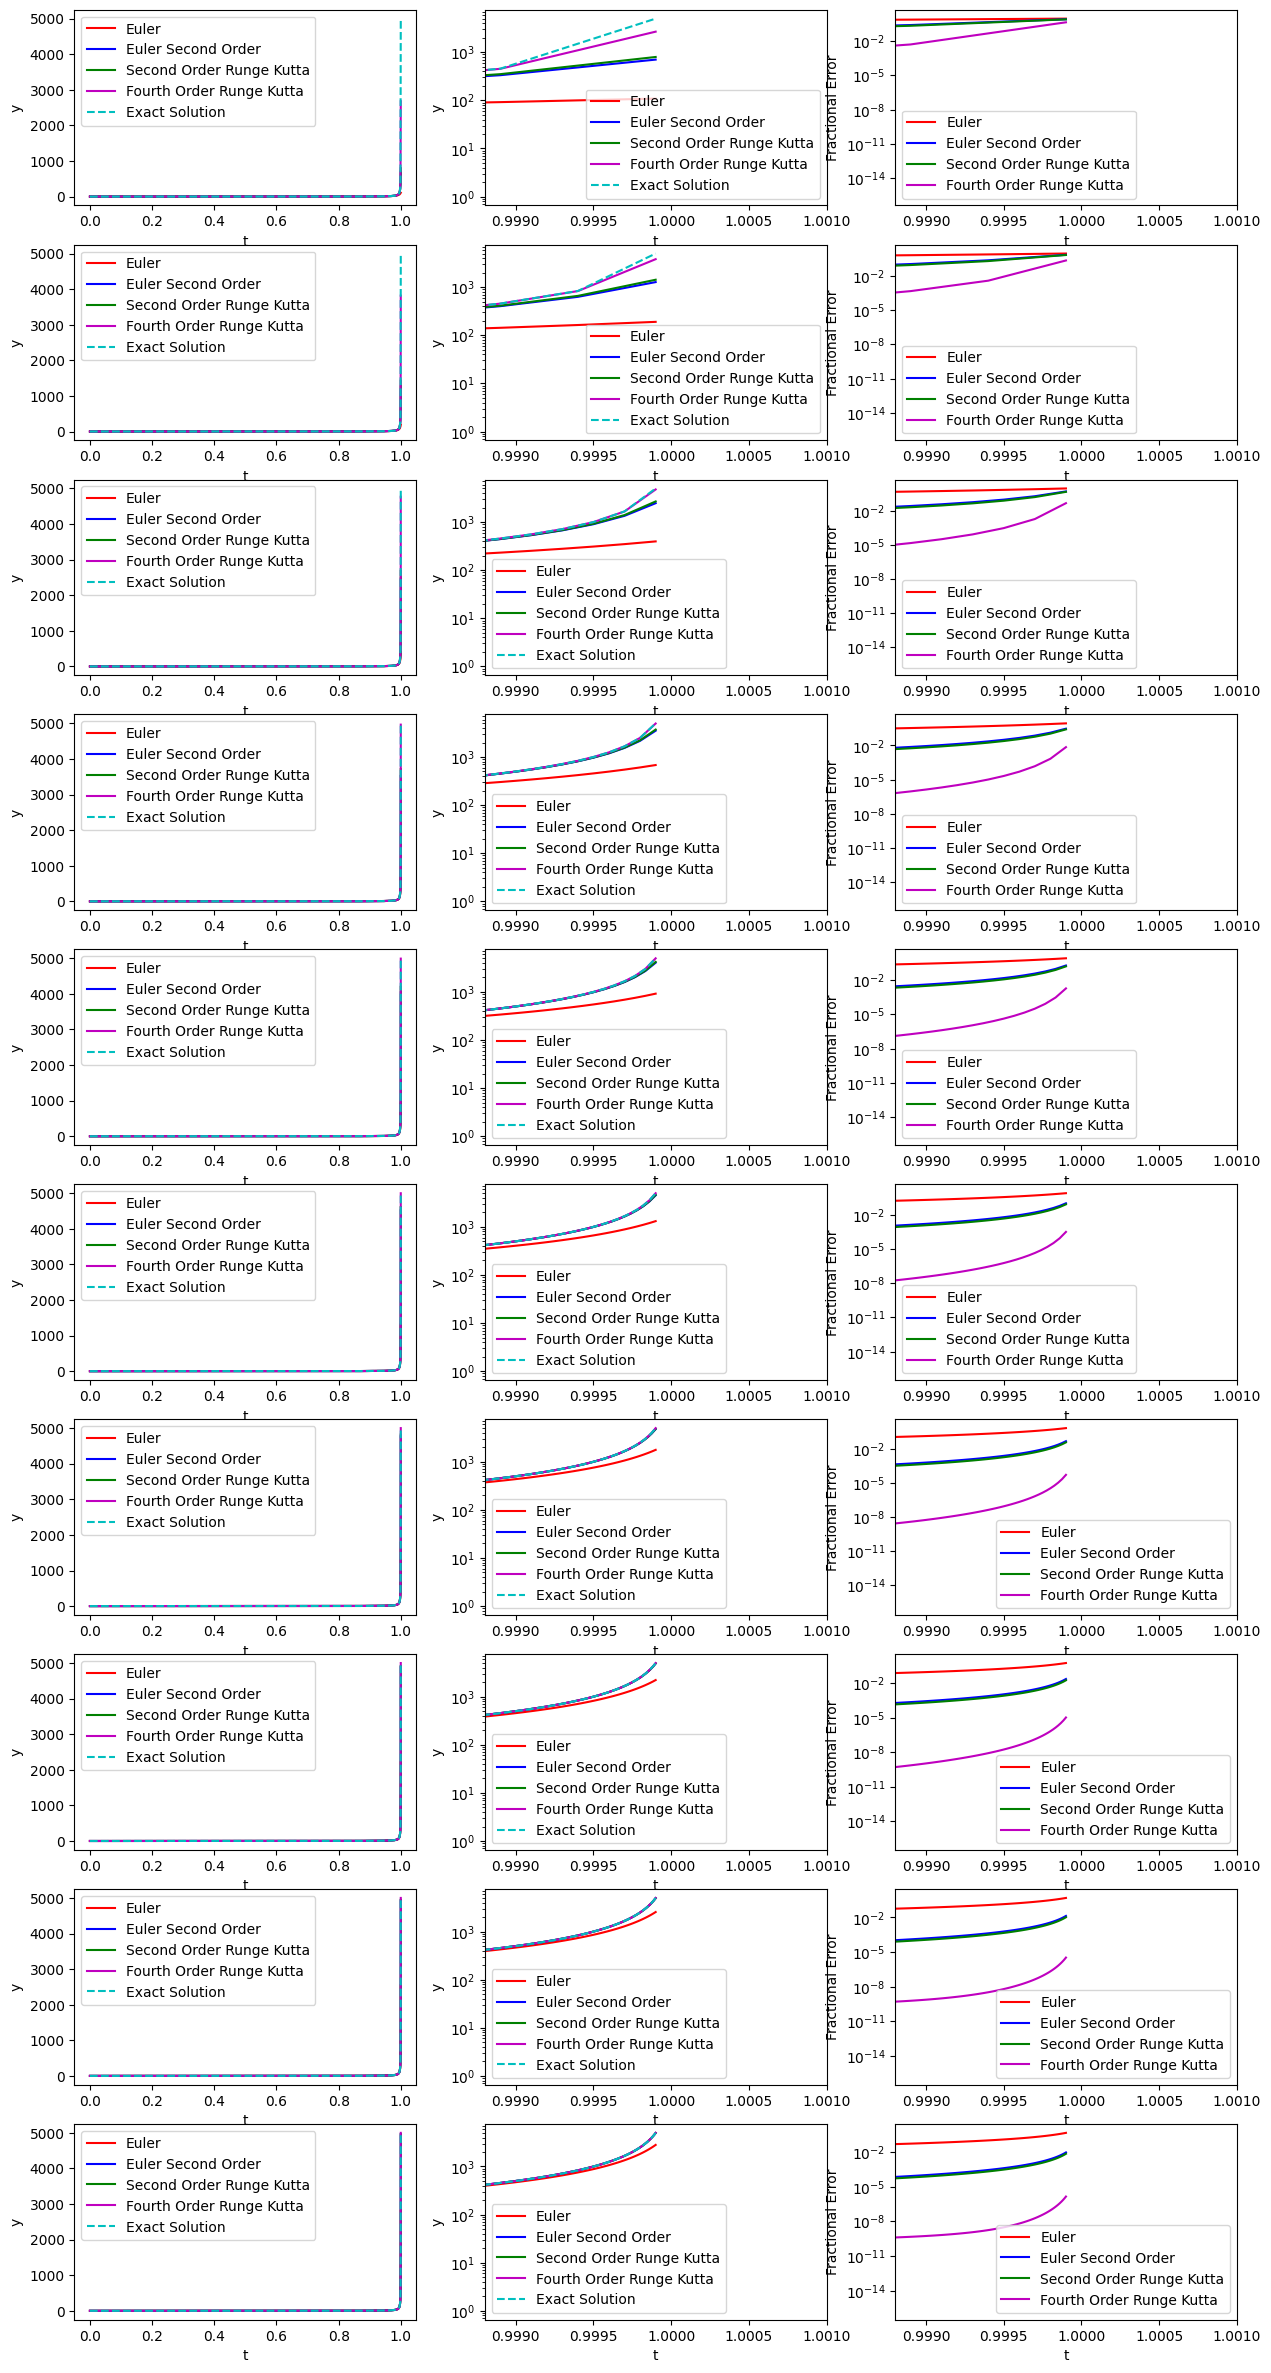

In [9]:
# Create a figure that will contain 10 rows and 3 columns.  Each row corresponds 
# to a different time step size.  The columns will be (a) a plot of y vs. t using
# a linear scale, for the entire interval, (b) a plot of y vs. t, using a log scale,
# near the end of the interval, and (b) the difference between the exact solution
# and the numerical solution, using a log scale.

fig, axs = plt.subplots(10, 3,figsize=(15,30))

# Create an array for the various values of the number of steps

Steps = np.zeros(10)
Steps[0] = 1000
Steps[1] = 2000
Steps[2] = 5000
Steps[3] = 10000
Steps[4] = 15000
Steps[5] = 25000
Steps[6] = 40000
Steps[7] = 60000
Steps[8] = 80000
Steps[9] = 100000

# Create arrays to hold the error (the difference between the exact value and the numerical value)
# at the LAST step, for each step size and each of the four methods.

e1 = np.zeros(10)
e2 = np.zeros(10)
e3 = np.zeros(10)
e4 = np.zeros(10)

debug = False

# Main loop over the various step sizes/number of steps

for istep in range(10):
    
    # calculate the step size
    nStep = int(Steps[istep])
    a = 0.9999
    tau = a/nStep

    # Set the initial values of y, y', and y''
    y0 = 1.0
    yp0 = 0.0
    ypp0 = 2.0
    #y0 = 1.0
    #yp0 = 1.0
    #ypp0 = 1.0

    # choose the starting value of the interval
    tlow = 0

    # create arrays to hold the exact solution
    yy = array('d')
    tt = array('d')

    # fill the exact solution arrays ... remember that for nStep steps, we will want values
    # from t_0 to t_nStep, which amounts to nStep+1 values.
    for i in range(0,nStep+1):
        texact = tlow + i*tau
        yy.append(yexact(texact))
        tt.append(texact)
    
    #print(yy,tt)
    
    # create arrays to hold (a) the value of the function, (b) a "state" array, which is unused in
    # this problem, but could be used for other multi-dimensional differential equations, (c) the
    # derivative of the function, (d) the second derivative of the function, and (e) arrays to hold
    # the values of the function and time for plotting.  Do this for each of the four methods.  Also,
    # set the initial values.
    y1 = array('d')
    y2 = array('d')
    y3 = array('d')
    y4 = array('d')
    
    state1 = array('d')
    state2 = array('d')
    state3 = array('d')
    state4 = array('d')

    deriv1 = array('d')
    deriv2 = array('d')
    deriv3 = array('d')
    deriv4 = array('d')
    
    secondderiv1 = array('d')
    secondderiv2 = array('d')
    secondderiv3 = array('d')
    secondderiv4 = array('d')

    nState = 1

    y1.append(y0)
    y2.append(y0)
    y3.append(y0)
    y4.append(y0)

    state1.append(y1[0])
    state2.append(y2[0])
    state3.append(y3[0])
    state4.append(y4[0])

    for i in range(0,nState):
        deriv1.append(yp0)
        deriv2.append(yp0)
        deriv3.append(yp0)
        deriv4.append(yp0)
        secondderiv1.append(ypp0)
        secondderiv2.append(ypp0)
        secondderiv3.append(ypp0)
        secondderiv4.append(ypp0)
    
    yplot1 = array('d')
    yplot2 = array('d')
    yplot3 = array('d')
    yplot4 = array('d')

    tplot1 = array('d')
    tplot2 = array('d')
    tplot3 = array('d')
    tplot4 = array('d')
    
    # Loop over the various methods (1 = Euler, 2 = Second order Euler, 3 = Second order R-K, 4 = Fourth order R-K)
    # In each case, the process is (a) add the current values to the plotting arrays, (b) calculate the new y value
    # using the appropriate method, (c) update the values of y and time.

    for method in range(1,5):
        time = 0.0
        for iStep in range(0,nStep+1):
        
            if (method == 1):
                yplot1.append(y1[0])
                tplot1.append(time)
                euler(state1,nState,time,tau,deriv1)
                y1[0] = state1[0]
                time = time + tau
            else:
                if (method == 2):
                    yplot2.append(y2[0])
                    tplot2.append(time)
                    euler2(state2,nState,time,tau,deriv2,secondderiv2)
                    y2[0] = state2[0]
                    time = time + tau
                else:
                    if (method == 3):
                        yplot3.append(y3[0])
                        tplot3.append(time)
                        rk2(state3,nState,time,tau,deriv3)
                        y3[0]=state3[0]
                        time = time + tau
                    else:
                        yplot4.append(y4[0])
                        tplot4.append(time)
                        rk4(state4,nState,time,tau,deriv4)
                        y4[0]=state4[0]
                        time = time + tau


                

    if debug:
        print ('Time Values at interval endpoints')
        print (tplot1[nStep],tplot2[nStep],tplot3[nStep],tplot4[nStep])
        print (tplot1[0],tplot2[0],tplot3[0],tplot4[0])
        print (len(tplot1),len(tplot2),len(tplot3),len(tplot4))

        print ('Function Values at interval endpoints')
        print (yplot1[nStep],yplot2[nStep],yplot3[nStep],yplot4[nStep])
        print (yplot1[0],yplot2[0],yplot3[0],yplot4[0])
        print (len(yplot1),len(yplot2),len(yplot3),len(yplot4))
        
        
    # Finally, plot everything!!!!
    
    axs[istep][0].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
    axs[istep][0].plot(tplot2[0:nStep+1],yplot2[0:nStep+1],'b-',label='Euler Second Order')
    axs[istep][0].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][0].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][0].plot(tt,yy,'c--',label='Exact Solution')
    axs[istep][0].set_ylabel('y')
    axs[istep][0].set_xlabel('t')
    axs[istep][0].legend()
    
    axs[istep][1].plot(tplot1[0:nStep+1],yplot1[0:nStep+1],'r-',label='Euler')
    axs[istep][1].plot(tplot2[0:nStep+1],yplot2[0:nStep+1],'b-',label='Euler Second Order')
    axs[istep][1].plot(tplot3[0:nStep+1],yplot3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][1].plot(tplot4[0:nStep+1],yplot4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][1].plot(tt,yy,'c--',label='Exact Solution')
    axs[istep][1].set_yscale('log')
    axs[istep][1].set_ylabel('y')
    axs[istep][1].set_xlabel('t')
    axs[istep][1].set_xlim(2*a-1.001,1.001)
    #axs[istep][1].set_ylim(40,4000)
    axs[istep][1].legend()

    import numpy as np
    yplot1 = np.array(yplot1)
    yplot2 = np.array(yplot2)
    yplot3 = np.array(yplot3)
    yplot4 = np.array(yplot4)
    yy = np.array(yy)
    tplot1 = np.array(tplot1)
    tplot2 = np.array(tplot2)
    tplot3 = np.array(tplot3)
    tplot4 = np.array(tplot4)

    yerr1 = np.abs(yplot1-yy)/yy
    yerr2 = np.abs(yplot2-yy)/yy
    yerr3 = np.abs(yplot3-yy)/yy
    yerr4 = np.abs(yplot4-yy)/yy

    if debug:
        print ('Values at a = 0.9999')
        print (yplot4[nStep],yplot3[nStep],yplot2[nStep],yplot1[nStep],yy[nStep])
        print (tplot4[nStep],tplot3[nStep],tplot2[nStep],tplot1[nStep],tt[nStep])
    
    e1[istep] = yerr1[nStep]
    e2[istep] = yerr2[nStep]
    e3[istep] = yerr3[nStep]
    e4[istep] = yerr4[nStep]
    
    axs[istep][2].plot(tplot1[0:nStep+1],yerr1[0:nStep+1],'r-',label='Euler')
    axs[istep][2].plot(tplot2[0:nStep+1],yerr2[0:nStep+1],'b-',label='Euler Second Order')
    axs[istep][2].plot(tplot3[0:nStep+1],yerr3[0:nStep+1],'g-',label='Second Order Runge Kutta')
    axs[istep][2].plot(tplot4[0:nStep+1],yerr4[0:nStep+1],'m-',label='Fourth Order Runge Kutta')
    axs[istep][2].set_yscale('log')
    axs[istep][2].set_ylabel('Fractional Error')
    axs[istep][2].set_xlabel('t')
    axs[istep][2].set_xlim(2*a-1.001,1.001)
    #axs[istep][2].set_ylim(0.001,1)
    axs[istep][2].legend()

Now that we have our solutions, we want to look a bit more at the error plots.  Theoretically, our expectation
is that the $LOCAL$ error at each time step will vary according to:

\begin{equation}
\left ( \frac{\delta y}{y} \right )_{local} \sim \hspace{0.06in} \tau^k
\end{equation}

where $\tau$ is the time step and $k$
will depend on the method being used.  For the methods considered here, we expect:

\begin{equation}
Euler: k = 2 \\
Euler~Second~Order: k = 3 \\
R-K~Second~Order: k = 3 \\
R-K~Fourth~Order: k = 5
\end{equation}

Now, the $GLOBAL$ error will accumulate at each time step.  Thus, we expect this global error to vary as:

\begin{equation}
\left ( \frac{\delta y}{y} \right )_{global} \sim \hspace{0.06in} N_{steps} \cdot \left ( \frac{\delta y}{y} \right )_{local} \sim \hspace{0.06in} N_{steps} \cdot \tau^k \sim \hspace{0.06in} \tau^{k-1}
\end{equation}

since $N_{steps} \sim \frac{1}{\tau}$.



[9.98901099e-04 4.99700150e-04 1.99940012e-04 9.99800020e-05
 6.66555563e-05 3.99944002e-05 2.49968751e-05 1.66647223e-05
 1.24985938e-05 9.99890001e-06]
[0.97824955 0.9619752  0.92066609 0.86393019 0.8160731  0.73735467
 0.6467047  0.55731937 0.49041347 0.43820006]
[0.85933222 0.74499223 0.50591948 0.29582272 0.19084185 0.09630211
 0.04595553 0.02279762 0.01352387 0.00892731]
[0.84051496 0.7146303  0.46307117 0.25699368 0.16038389 0.0779076
 0.03618046 0.0176529  0.01038379 0.00682006]
[4.64210182e-01 2.36406685e-01 4.66779159e-02 7.09578805e-03
 1.88036021e-03 2.99944055e-04 5.02259675e-05 1.03180949e-05
 3.31878928e-06 1.37183636e-06]
Euler slope =  [0.16991621]  ... expect 1
Euler Second Order slope =  [1.02568519]  ... expect 2
Second Order RK Slope =  [1.08462676]  ... expect 2
4th Order RK slope =  [2.89399675]  ... expect 4


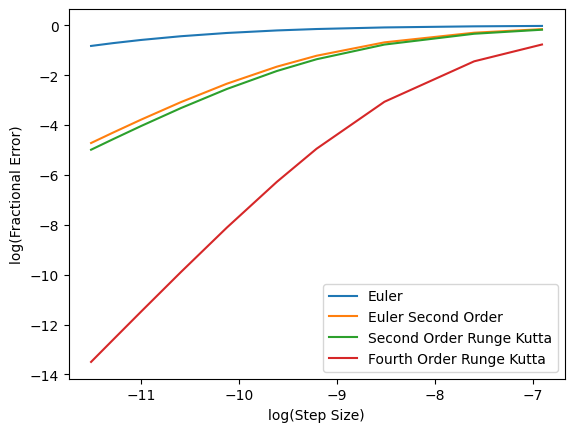

In [10]:
dt = a/(Steps+1)

debug = True

if debug:
    print (dt)
    print (e1)
    print (e2)
    print (e3)
    print (e4)

plt.plot(np.log(dt),np.log(e1),label='Euler')
plt.plot(np.log(dt),np.log(e2),label='Euler Second Order')
plt.plot(np.log(dt),np.log(e3),label='Second Order Runge Kutta')
plt.plot(np.log(dt),np.log(e4),label='Fourth Order Runge Kutta')
plt.xlabel('log(Step Size)')
plt.ylabel('log(Fractional Error)')

from sklearn.linear_model import LinearRegression

x = np.log(dt).reshape(-1,1)
y = np.log(e1)
model = LinearRegression().fit(x, y)
print ('Euler slope = ',model.coef_,' ... expect 1')

x = np.log(dt).reshape(-1,1)
y = np.log(e2)
model = LinearRegression().fit(x, y)
print ('Euler Second Order slope = ',model.coef_,' ... expect 2')

x = np.log(dt).reshape(-1,1)
y = np.log(e3)
model = LinearRegression().fit(x, y)
print ('Second Order RK Slope = ',model.coef_,' ... expect 2')

x = np.log(dt).reshape(-1,1)
y = np.log(e4)
model = LinearRegression().fit(x, y)
print ('4th Order RK slope = ',model.coef_,' ... expect 4')

#plt.xscale('log')
#plt.yscale('log')
plt.legend()